In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import r2_score
#Import dataset
df = pd.read_csv('40192_2013_16_MOESM1_ESM.csv')
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [37]:
#Function used to provide statistical insight of the dataframe
df.describe()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,126.295289,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,219.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,328.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,437.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


In [38]:
# Drop the serial number column from the dataset for preventing any errors in the model
df.drop('Sl. No.', axis=1, inplace=True)
# Data scaling using z-score approach 
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.203746,-0.595127,-1.338343,-1.176664,-0.792909,-0.171244,0.734739,2.017972,3.102949,-1.721432
1,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,0.389195,-0.512968,-1.095210,0.248847,-0.792909,-0.544536,2.022669,-0.412047,3.102949,-1.705339
2,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,0.063375,-0.583390,-1.314030,-1.176664,-0.792909,0.601383,0.734739,2.017972,-0.741101,-1.705339
3,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.529567,-0.595127,-1.338343,-1.176664,-0.792909,1.417416,0.412757,-0.412047,-0.741101,-1.673153
4,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,-3.092120,...,1.203746,-0.595127,-1.338343,-0.973020,-0.792909,-0.171244,-0.231208,2.017972,-0.741101,-1.758982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,5.387831,-2.299022,...,1.529567,-0.583390,0.825539,-1.176664,0.911195,-1.186945,0.090774,0.802963,-0.741101,2.559297
433,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,5.387831,-2.299022,...,0.063375,-0.524705,1.238865,0.248847,0.911195,-0.683435,-0.971768,0.073957,0.027709,2.167701
434,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,1.263492,-2.054992,...,0.715016,-0.536442,1.457684,0.045203,1.138409,-0.405637,1.056722,-0.412047,-0.741101,2.956257
435,2.203807,-2.529863,-2.531162,-1.360296,2.846782,2.363933,2.893723,4.167558,1.263492,-2.054992,...,1.529567,-0.583390,0.825539,-1.176664,0.911195,-1.186945,0.090774,0.802963,-0.741101,2.441282


Chemical Composition, Mill Product Features, and Heat Treatment parameters

Text(0, 0.5, 'Information Gain')

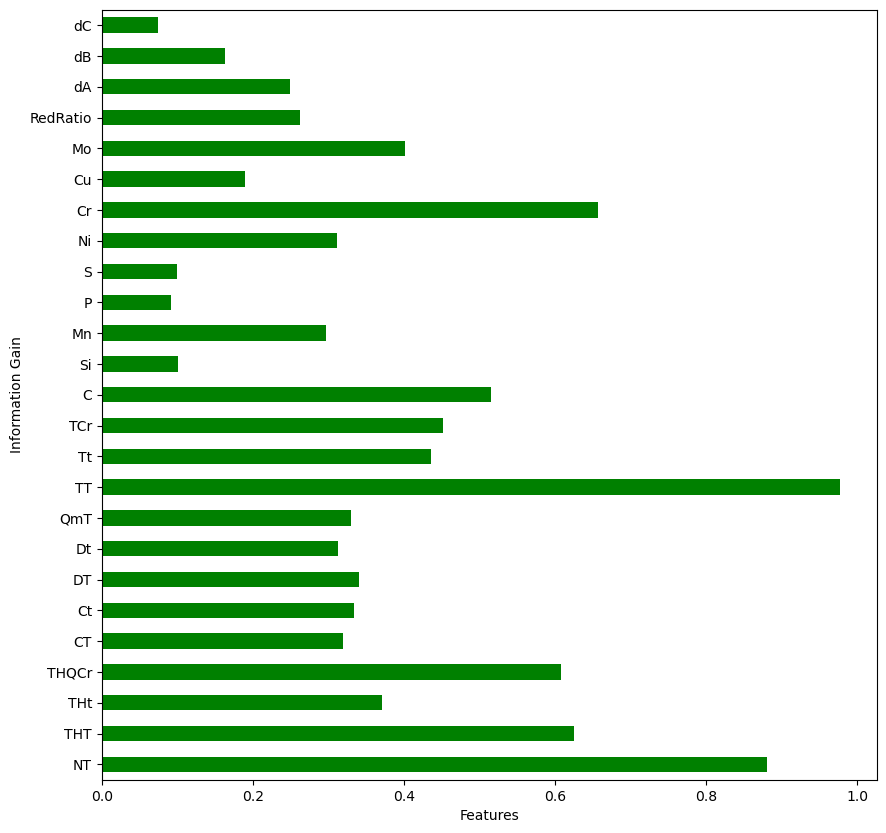

In [39]:
# Arrange scaled data into features and target variables
X = df_std[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt',
       'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio',
       'dA', 'dB', 'dC']]
y = df_std['Fatigue']
from sklearn.feature_selection import mutual_info_regression
importances = mutual_info_regression(X,y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind = 'barh' , color = 'green', figsize = (10,10))
plt.xlabel("Features")
plt.ylabel("Information Gain")

In [40]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Linear Regression

In [41]:
#Import Libraries
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Import Libraries
from sklearn.model_selection import  KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import r2_score

In [42]:
#Fit Training data using linear regression
model_CV = lm.fit(X_train, y_train)
#define cross-validation method to use
cv  = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores_MAE = cross_val_score(model_CV, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model_CV, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
scores_MSE = cross_val_score(model_CV, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [43]:
# Performance Evaluation Metrics
from sklearn import metrics
print('Linear Regression MAE:', mean(absolute(scores_MAE)))
print('Linear Regression RMSE:', sqrt(mean(absolute(scores_MSE))))
print('Linear Regression R squared:', mean(absolute(scores_r2)))
print('Linear Regression mean R squared:', sqrt(mean(absolute(scores_r2))))

Linear Regression MAE: 0.13204783133824624
Linear Regression RMSE: 0.1838398863672785
Linear Regression R squared: 0.9624240706642253
Linear Regression mean R squared: 0.9810321455814918


In [44]:
# Predict target variable from the cross fold validation 
from sklearn.model_selection import cross_val_predict
predicted_CV_LM = cross_val_predict(lm, X_test, y_test, cv=cv)

Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

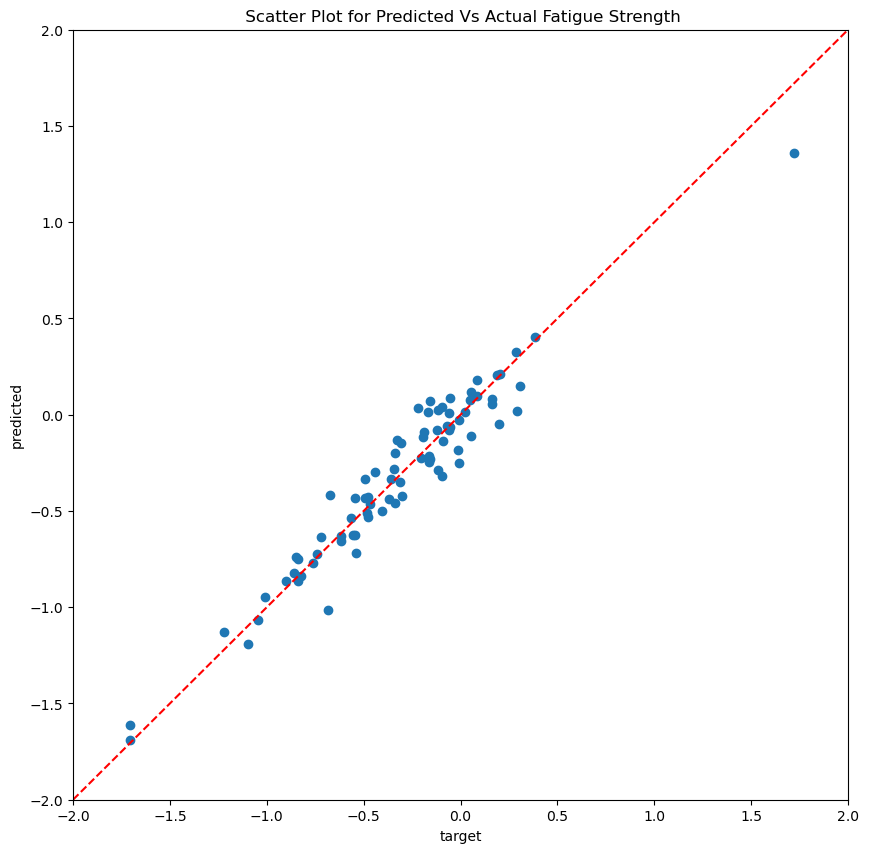

In [45]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_CV_LM)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")

decision tree

In [46]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
model_Dtree = DecisionTreeRegressor()
# Set Grid Search Parameters
parameters = {'max_depth':range(3,20)}
grid_Dtree = GridSearchCV(model_Dtree, parameters,refit=True,verbose=10,cv=cv, scoring ='r2')
grid_Dtree.fit(X_train,y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits
[CV 1/10; 1/17] START max_depth=3...............................................
[CV 1/10; 1/17] END ................max_depth=3;, score=0.935 total time=   0.0s
[CV 2/10; 1/17] START max_depth=3...............................................
[CV 2/10; 1/17] END ................max_depth=3;, score=0.847 total time=   0.0s
[CV 3/10; 1/17] START max_depth=3...............................................
[CV 3/10; 1/17] END ................max_depth=3;, score=0.915 total time=   0.0s
[CV 4/10; 1/17] START max_depth=3...............................................
[CV 4/10; 1/17] END ................max_depth=3;, score=0.937 total time=   0.0s
[CV 5/10; 1/17] START max_depth=3...............................................
[CV 5/10; 1/17] END ................max_depth=3;, score=0.955 total time=   0.0s
[CV 6/10; 1/17] START max_depth=3...............................................
[CV 6/10; 1/17] END ................max_depth=

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 20)}, scoring='r2', verbose=10)

In [47]:
#Best Grid paramters using Cross fold validation
grid_Dtree.best_estimator_
DecisionTreeRegressor(max_depth=7)
predicted_Final_Dtree = grid_Dtree.predict(X_test)
print('Decision Tree MAE:', metrics.mean_absolute_error(y_test,predicted_Final_Dtree))
print('Decision Tree RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_Final_Dtree)))
print('Decision Tree R squared:', metrics.r2_score(y_test,predicted_Final_Dtree))
print('Decision Tree R squared:', sqrt(metrics.r2_score(y_test,predicted_Final_Dtree)))

Decision Tree MAE: 0.1219214340738599
Decision Tree RMSE: 0.17429568683803104
Decision Tree R squared: 0.9633404936982042
Decision Tree R squared: 0.9814991052966906


Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

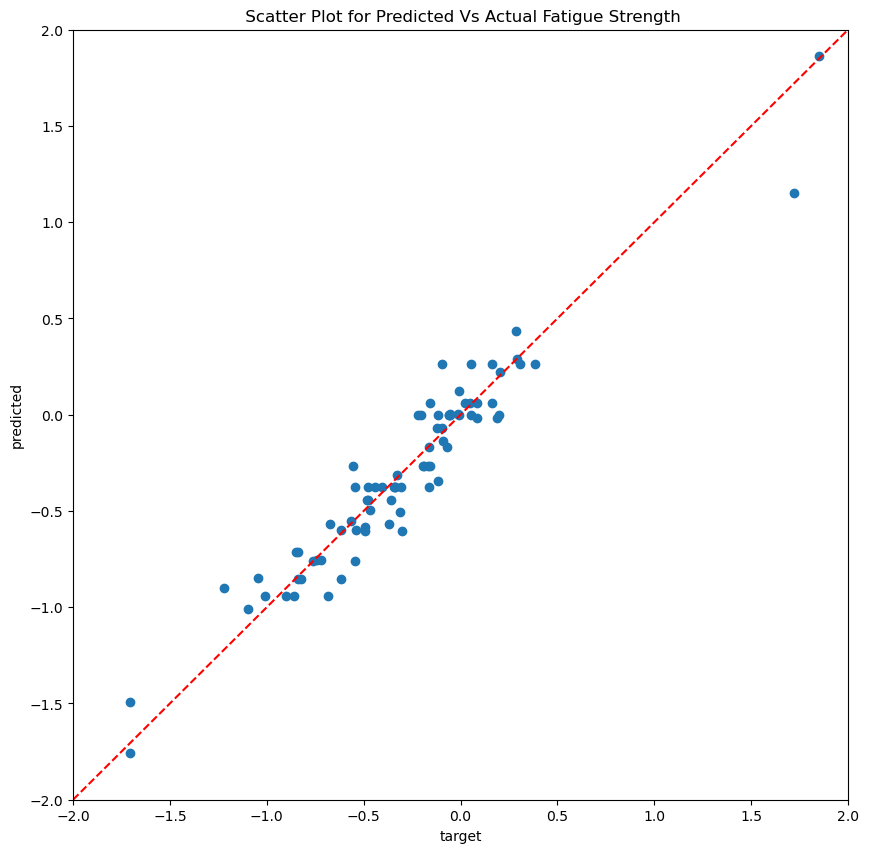

In [48]:
#Plot Actual versus the predicted fatigue strength
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_Final_Dtree)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")

SVC

In [49]:
from sklearn import svm


In [50]:
model = svm.SVR()

In [51]:
model.fit(X_train,y_train)

SVR()

In [52]:
predicted_SVC = model.predict(X_test)

In [53]:
#Performance Evaluation metrics
from sklearn import metrics
from numpy import sqrt
print('SVC MAE:', metrics.mean_absolute_error(y_test,predicted_SVC))
print('SVC RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_SVC)))
print('SVC R squared:', metrics.r2_score(y_test,predicted_SVC))
print('SVC R squared:', sqrt(metrics.r2_score(y_test,predicted_SVC)))

SVC MAE: 0.10055158899376061
SVC RMSE: 0.15129907561259523
SVC R squared: 0.9723760435249093
SVC R squared: 0.9860912957352931


In [54]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_SVC = GridSearchCV(model,param_grid,refit=True,verbose=10,cv=cv, scoring ='neg_mean_absolute_error')

In [57]:
grid_SVC.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 1/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.708 total time=   0.0s
[CV 2/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 2/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.404 total time=   0.0s
[CV 3/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 3/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.551 total time=   0.0s
[CV 4/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 4/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.658 total time=   0.0s
[CV 5/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 5/10; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=-0.922 total time=   0.0s
[CV 6/10; 1/25] START C=0.1, gamma=1, kernel=rbf................................
[CV 6/10; 1/25] END C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_absolute_error', verbose=10)

In [58]:
grid_SVC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [59]:
grid_SVC.best_estimator_

SVR(C=100, gamma=0.001)

In [60]:
predicted_Final_SVC = grid_SVC.predict(X_test)

In [61]:
print('SVC MAE:', metrics.mean_absolute_error(y_test,predicted_Final_SVC))
print('SVC RMSE:', sqrt(metrics.mean_squared_error(y_test,predicted_Final_SVC)))
print('SVC R squared:', metrics.r2_score(y_test,predicted_Final_SVC))
print('SVC R squared:', sqrt(metrics.r2_score(y_test,predicted_Final_SVC)))

SVC MAE: 0.09570475729784285
SVC RMSE: 0.14588641192120055
SVC R squared: 0.9743171616870564
SVC R squared: 0.9870750537254279


Text(0.5, 1.0, ' Scatter Plot for Predicted Vs Actual Fatigue Strength')

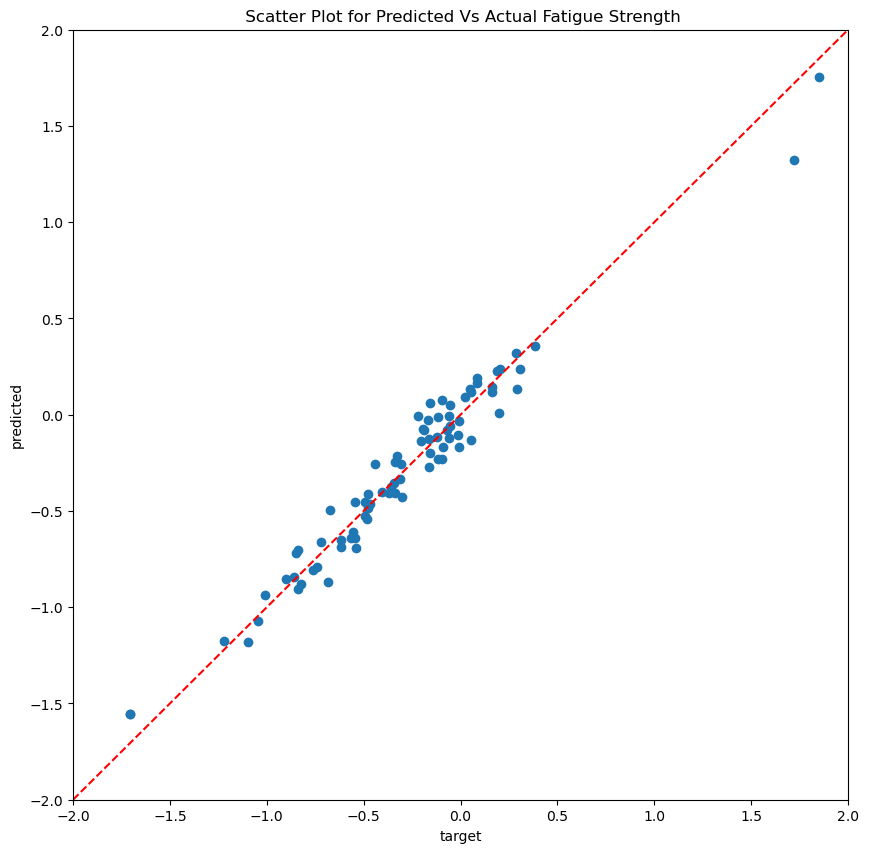

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test,predicted_Final_SVC)
# dashed diagonal line
plt.plot([-2,2], [-2, 2], 'r--')
# x and y axis range
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# x and y labels|
plt.xlabel("target")
plt.ylabel("predicted")
plt.title(" Scatter Plot for Predicted Vs Actual Fatigue Strength")